<a href="https://colab.research.google.com/github/vinalyan/diff/blob/master/kagle_Intermediate_Machine_Learning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дискретная переменная 
**Categorical** **Variables**

Тут я пытаюсь разобраться с [Categorical Variables
](https://www.kaggle.com/alexisbcook/categorical-variables)

# Теория
В этом разделе, мы разберемся с понятием **дискретная (категрийная)** **переменная** и три подхода к работе с такими переменными. 


## Введение
**Дискретная переменная** может принимать ограниченное число значений.
*   Рассмотрим опрос в котором спрашивается, как часто вы едите завтра и предлают четыре варианта ответа: *"Никогда", "Редко", "Большинство дней", "Каждый день"* ("Never", "Rarely", "Most days", or "Every day"). В этом случае данные являются дискретными, так как ответы попадают в фиксированный набор категоний.
*   Если люди ответили на вопрос какая у них машина, ответы попадают в категории "Хонда", "Тайота", "Прочий хлам". Это тоже дискретные переменные. 

В большинстве моделей машинного обучения на языке Python без правильной подготовки данных с дискретными переменными может быть много дефектов. 






## Три основных подхода к работы с дискретными данными



### 1. Удаление дискретных переменных Drop Categorical Variables
Простейший вариант работы с дискретными переменными - это удаление их из набора данных. 
Данный подход хорошо работает только в случае, если колонка с дискретными переменными не несет полезной информации. 


### 2. Кодировка метки Label Encoding
**Кодировка метки** - присвоение каждому уникальному значению отдельного целого значнения.
Данный подход предполагает упорядочивание категорий.
**"Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).**




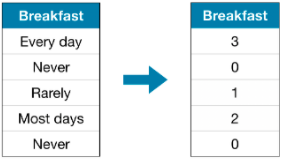

Не все дискретные переменные имеют четкий порядок следования. 
Дискретные переменные с четким порядком следования называются **порядковыми (ordinal variables)**

В моделях основанных на деревянной структуре (типа решающих деревьев) можно ожидать, что такой подход будет работать корректно.

### 3. Горячая замена (One-Hot Encoding)

При данном подходе в наборе данных создается новые колонки, отображающие все возможные варианты переменной. 


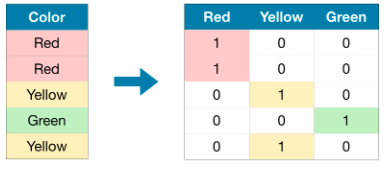

В оригинальном наборе данных, "Color" это дискретная переменная, принимающая три значения "Red", "Yellow" и "Green". 
Каждому значению сопоставлена новая колонка таблицы. 
Там, где в исходных данных было значение "Red" мы в колонке "Red" поставили 1. Так поступили и для всех остальных значений

Дискретные переменные из указанного примера не имеют четкой упорядоченности и называются **номинальными переменными**


## Примеры
Мы будем работать с  [Melbourne Housing dataset](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home).

Мы не будем фокусироваться на стадии загузки данных. Это было сделано на предыдущих уроках. 
На начало примера мы имеем обученную модель 

```X_train``` - обучающие данные 

```X_valid``` - данные для проверки

```y_train``` - обучаю

```y_valid```



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
f= open('/content/drive/My Drive/Colab Notebooks/Kaggle/melb_data.csv', 'r')  

In [12]:
f.read()

"Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount\nAbbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,,,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0\nAbbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0\nAbbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0\nAbbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,,,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0\nAbbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0\nAbbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.